In [111]:
import os
def load_data(path):
    """
    Load the dataset
    """
    input_file=os.path.join(path)
    with open(input_file,"r") as f:
        data=f.read()
    return data.split('\n')

In [112]:
english_sentences=load_data('europarl-v7.fr-en.en')
french_sentences=load_data('europarl-v7.fr-en.fr')


In [113]:
for sample_i in range(2):
    print('small_vocab_en line {}: {}'.format(sample_i + 1,english_sentences[sample_i]))
    print('samll vocab_fr line {}: {}'.format(sample_i + 1,french_sentences[sample_i]))

small_vocab_en line 1: new jersey is sometimes quiet during autumn , and it is snowy in april .
samll vocab_fr line 1: new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
small_vocab_en line 2: the united states is usually chilly during july , and it is usually freezing in november .
samll vocab_fr line 2: les Ã©tats-unis est gÃ©nÃ©ralement froid en juillet , et il gÃ¨le habituellement en novembre .


In [114]:
import collections
english_words_counter=collections.Counter([word for sentence in english_sentences for word in sentence.split() ])
#print the count for each corresponding word
french_words_counter=collections.Counter([word for sentence in french_sentences for word in sentence.split() ])

print('{} total english words'.format(english_words_counter))

Counter({'is': 205858, ',': 140897, '.': 129039, 'in': 75525, 'it': 75137, 'during': 74933, 'the': 67628, 'but': 63987, 'and': 59850, 'sometimes': 37746, 'usually': 37507, 'never': 37500, 'least': 27564, 'favorite': 27371, 'fruit': 27105, 'most': 14934, 'loved': 13666, 'liked': 13546, 'new': 12197, 'paris': 11334, 'india': 11277, 'united': 11270, 'states': 11270, 'california': 11250, 'jersey': 11225, 'france': 11170, 'china': 10953, 'he': 10786, 'she': 10786, 'grapefruit': 10118, 'your': 9734, 'my': 9700, 'his': 9700, 'her': 9700, 'fall': 9134, 'june': 9133, 'spring': 9102, 'january': 9090, 'winter': 9038, 'march': 9023, 'autumn': 9004, 'may': 8995, 'nice': 8984, 'september': 8958, 'july': 8956, 'april': 8954, 'november': 8951, 'summer': 8948, 'december': 8945, 'february': 8942, 'our': 8932, 'their': 8932, 'freezing': 8928, 'pleasant': 8916, 'beautiful': 8915, 'october': 8910, 'snowy': 8898, 'warm': 8890, 'cold': 8878, 'wonderful': 8808, 'dry': 8794, 'busy': 8791, 'august': 8789, 'chil

In [115]:
ctr=0
print("{} english words".format(len([word for sentence in english_sentences for word in sentence.split()])))
print("{} unique english words".format(len(english_words_counter)))
print("{} french words".format(len([word for sentence in french_sentences for word in sentence.split()])))
print("{} unique french words".format(len(french_words_counter)))
print("total sentences in french {}:",format(len([sentence for sentence in french_sentences])))
print("total sentences in english {}: ",format(len([sentence for sentence in french_sentences])))

1823250 english words
227 unique english words
1961295 french words
355 unique french words
total sentences in french {}: 137861
total sentences in english {}:  137861


In [116]:
import numpy as np###########################3
from keras.losses import sparse_categorical_crossentropy
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical


def _test_model(model, input_shape, output_sequence_length, french_vocab_size):
    if isinstance(model, Sequential):
        model = model.model

    assert model.input_shape == (None, *input_shape[1:]),\
        'Wrong input shape. Found input shape {} using parameter input_shape={}'.format(model.input_shape, input_shape)

    assert model.output_shape == (None, output_sequence_length, french_vocab_size),\
        'Wrong output shape. Found output shape {} using parameters output_sequence_length={} and french_vocab_size={}'\
            .format(model.output_shape, output_sequence_length, french_vocab_size)

    assert len(model.loss_functions) > 0,\
        'No loss function set.  Apply the `compile` function to the model.'

    assert sparse_categorical_crossentropy in model.loss_functions,\
        'Not using `sparse_categorical_crossentropy` function for loss.'


def test_tokenize(tokenize):
    sentences = [
        'The quick brown fox jumps over the lazy dog .',
        'By Jove , my quick study of lexicography won a prize .',
        'This is a short sentence .']
    tokenized_sentences, tokenizer = tokenize(sentences)
    assert tokenized_sentences == tokenizer.texts_to_sequences(sentences),\
        'Tokenizer returned and doesn\'t generate the same sentences as the tokenized sentences returned. '


def test_pad(pad):
    tokens = [
        [i for i in range(4)],
        [i for i in range(6)],
        [i for i in range(3)]]
    padded_tokens = pad(tokens)
    padding_id = padded_tokens[0][-1]
    true_padded_tokens = np.array([
        [i for i in range(4)] + [padding_id]*2,
        [i for i in range(6)],
        [i for i in range(3)] + [padding_id]*3])
    assert isinstance(padded_tokens, np.ndarray),\
        'Pad returned the wrong type.  Found {} type, expected numpy array type.'
    assert np.all(padded_tokens == true_padded_tokens), 'Pad returned the wrong results.'

    padded_tokens_using_length = pad(tokens, 9)
    assert np.all(padded_tokens_using_length == np.concatenate((true_padded_tokens, np.full((3, 3), padding_id)), axis=1)),\
        'Using length argument return incorrect results'


def test_simple_model(simple_model):
    input_shape = (137861, 21, 1)
    output_sequence_length = 21
    english_vocab_size = 199
    french_vocab_size = 344

    model = simple_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size)
    _test_model(model, input_shape, output_sequence_length, french_vocab_size)


def test_embed_model(embed_model):
    input_shape = (137861, 21)
    output_sequence_length = 21
    english_vocab_size = 199
    french_vocab_size = 344

    model = embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size)
    _test_model(model, input_shape, output_sequence_length, french_vocab_size)


def test_encdec_model(encdec_model):
    input_shape = (137861, 15, 1)
    output_sequence_length = 21
    english_vocab_size = 199
    french_vocab_size = 344

    model = encdec_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size)
    _test_model(model, input_shape, output_sequence_length, french_vocab_size)


def test_bd_model(bd_model):
    input_shape = (137861, 21, 1)
    output_sequence_length = 21
    english_vocab_size = 199
    french_vocab_size = 344

    model = bd_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size)
    _test_model(model, input_shape, output_sequence_length, french_vocab_size)


def test_model_final(model_final):
    input_shape = (137861, 15)
    output_sequence_length = 21
    english_vocab_size = 199
    french_vocab_size = 344

    model = model_final(input_shape, output_sequence_length, english_vocab_size, french_vocab_size)
    _test_model(model, input_shape, output_sequence_length, french_vocab_size)


In [38]:
from keras.preprocessing.text import Tokenizer
def tokenize(x):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(x)
    return tokenizer.texts_to_sequences(x),tokenizer
test_tokenize(tokenize)
# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized,text_tokenizer=tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i,(sent,token_sent) in enumerate(zip(text_sentences,text_tokenized)):
    print('Sequence {} in x'.format(sample_i+1))
    print('Input: {}'.format(sent))
    print('Output {}'.format(token_sent))


{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}

Sequence 1 in x
Input: The quick brown fox jumps over the lazy dog .
Output [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
Input: By Jove , my quick study of lexicography won a prize .
Output [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
Input: This is a short sentence .
Output [18, 19, 3, 20, 21]


In [117]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences
def pad(x,length=None):
    return pad_sequences(x,maxlen=length,padding='post')
test_pad(pad)
test_pad=pad(text_tokenized)
for sample_i,(token_sent,pad_sent) in enumerate(zip(text_tokenized,test_pad)):
    print('Sequence {} in x'.format(sample_i+1))
    print('Input {}'.format(np.array(token_sent)))
    print('Output: {}'.format(pad_sent))
"""
alist = ['a1', 'a2', 'a3']
blist = ['b1', 'b2', 'b3']

for a, b in zip(alist, blist):
    print a, b
    results:
a1 b1
a2 b2
a3 b3
alist = ['a1', 'a2', 'a3']

for i, a in enumerate(alist):
    print i, a
Results:

0 a1
1 a2
2 a3
    
    """

Sequence 1 in x
Input [1 2 4 5 6 7 1 8 9]
Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
Input [10 11 12  2 13 14 15 16  3 17]
Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
Input [18 19  3 20 21]
Output: [18 19  3 20 21  0  0  0  0  0]


"\nalist = ['a1', 'a2', 'a3']\nblist = ['b1', 'b2', 'b3']\n\nfor a, b in zip(alist, blist):\n    print a, b\n    results:\na1 b1\na2 b2\na3 b3\nalist = ['a1', 'a2', 'a3']\n\nfor i, a in enumerate(alist):\n    print i, a\nResults:\n\n0 a1\n1 a2\n2 a3\n    \n    "

In [140]:
def preprocess(x,y):#combination of the above two functions
    preprocess_x,x_tk=tokenize(x)
    preprocess_y,y_tk=tokenize(y)
    preprocess_x=pad(preprocess_x)
    preprocess_y=pad(preprocess_y)##preprocess_x after padding,x_tk=words in all the sentences
    print('shape before:',preprocess_y.shape)#preprocess_y after reshaping
    preprocess_y=preprocess_y.reshape(*preprocess_y.shape,1)
    print('shpe after:',preprocess_y.shape[-1])#shape 0:13861,shape 1:21....&&& shape -1:last,shape-2:second last........
    return(preprocess_x,preprocess_y,x_tk,y_tk)
preproc_english_sentences,preproc_french_sentences,english_tokenizer,french_tokenizer=preprocess(english_sentences,french_sentences)
print('DAta preprocessed')
"""
shape before:1378621 is the total no of sentences,
21 is the total words in 1 sentences ---we are doing it only for french"""

shape before: (137861, 21)
shpe after: 1
DAta preprocessed


'\nshape before:1378621 is the total no of sentences,\n21 is the total words in 1 sentences ---we are doing it only for french'

In [141]:
#######################to see the output properly we r converting indices into words
def logits_to_text(logits,tokenizer):
    index_to_words={id:word for word,id in tokenizer.word_index.items()}
    index_to_words[0]='<PAD>'
    return' '.join([index_to_words[prediction] for prediction in np.argmax(logits,1)])
##argmax at wich th efunction output are as large as possible
print('logits_to_ text loaded.................')
"""
pred = np.array([[31, 23,  4, 24, 27, 34],
                [18,  3, 25,  0,  6, 35],
                [28, 14, 33, 22, 20,  8],
                [13, 30, 21, 19,  7,  9],
                [16,  1, 26, 32,  2, 29],
                [17, 12,  5, 11, 10, 15]])

y = np.array([[31, 23,  4, 24, 27, 34],
                [18,  3, 25,  0,  6, 35],
                [28, 14, 33, 22, 20,  8],
                [13, 30, 21, 19,  7,  9],
                [16,  1, 26, 32,  2, 29],
                [17, 12,  5, 11, 10, 15]])
Evaluating tf.argmax(pred, 1) gives a tensor whose evaluation will give array([5, 5, 2, 1, 3, 0])
"""

logits_to_ text loaded.................


'\npred = np.array([[31, 23,  4, 24, 27, 34],\n                [18,  3, 25,  0,  6, 35],\n                [28, 14, 33, 22, 20,  8],\n                [13, 30, 21, 19,  7,  9],\n                [16,  1, 26, 32,  2, 29],\n                [17, 12,  5, 11, 10, 15]])\n\ny = np.array([[31, 23,  4, 24, 27, 34],\n                [18,  3, 25,  0,  6, 35],\n                [28, 14, 33, 22, 20,  8],\n                [13, 30, 21, 19,  7,  9],\n                [16,  1, 26, 32,  2, 29],\n                [17, 12,  5, 11, 10, 15]])\nEvaluating tf.argmax(pred, 1) gives a tensor whose evaluation will give array([5, 5, 2, 1, 3, 0])\n'

In [142]:
#basic RNN
import os
from keras.models import load_model
import numpy as np
print(preproc_french_sentences.shape)
print(preproc_english_sentences.shape)
print("french",preproc_french_sentences.shape[2])
print(preproc_french_sentences[0])
print("english vocab size",len(english_tokenizer.word_index) )
print(preproc_french_sentences.shape[-2])#french we have reshaped before check the outputs for -3,-2,-1'

(137861, 21, 1)
(137861, 15)
french 1
[[ 35]
 [ 34]
 [  1]
 [  8]
 [ 67]
 [ 37]
 [ 11]
 [ 24]
 [  6]
 [  3]
 [  1]
 [112]
 [  2]
 [ 50]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]
english vocab size 199
21


In [143]:
#reshaping the english sentence 
print(preproc_english_sentences.shape)
print(preproc_english_sentences)
# earlier  english sentences padding was 15,now we increased the padding to 21 equal to that of french,,done below 
tmp_x=pad(preproc_english_sentences,preproc_french_sentences.shape[1])
print(tmp_x)
tmp_x=tmp_x.reshape((-1,preproc_french_sentences.shape[-2],1))
print("input shape: ", tmp_x.shape)#english sentence padding

(137861, 15)
[[17 23  1 ... 44  0  0]
 [ 5 20 21 ... 51  2 45]
 [22  1  9 ... 34  0  0]
 ...
 [24  1 10 ... 54  0  0]
 [ 5 84  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[17 23  1 ...  0  0  0]
 [ 5 20 21 ...  0  0  0]
 [22  1  9 ...  0  0  0]
 ...
 [24  1 10 ...  0  0  0]
 [ 5 84  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
input shape:  (137861, 21, 1)


In [44]:
# finally making a model--model1
from keras.layers import GRU, Input, Dense, TimeDistributed
from keras.models import Model, Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
#output_seq.len-max frech words(21)
#this we are doing for a single sentence
def simple_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size, learning_rate=0.1):
    #french_vocab_size---total unique frech words
    model=Sequential()
    model.add(GRU(128,dropout=0.1,input_shape=input_shape[1:],return_sequences=True))
    model.add(TimeDistributed(Dense(french_vocab_size,activation='softmax')))
    #time based back prop 
    model.summary()
     
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model
test_simple_model(simple_model)
simple_rnn_model=simple_model(tmp_x.shape, preproc_french_sentences.shape[1],len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)#word_index: A dictionary of words and their uniquely assigned integers.
if os.path.exists(os.path.join("cache", "simple_model.h5"))== False:
    simple_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=5, validation_split=0.2)
else:
    simple_rnn_model = load_model(os.path.join("cache", "simple_model.h5"))
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 21, 128)           49920     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 21, 344)           44376     
Total params: 94,296
Trainable params: 94,296
Non-trainable params: 0
_________________________________________________________________


C:\Users\VIDUSHI\anaconda\lib\site-packages\keras\engine\sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 21, 128)           49920     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 21, 346)           44634     
Total params: 94,554
Trainable params: 94,554
Non-trainable params: 0
_________________________________________________________________
Train on 110288 samples, validate on 27573 samples
Epoch 1/5
110288/110288 [==============================] - 168s 2ms/step - loss: 2.2438 - acc: 0.5520 - val_loss: 1.6812 - val_acc: 0.5971
Epoch 2/5
110288/110288 [==============================] - 172s 2ms/step - loss: 1.5758 - acc: 0.6246 - val_loss: 1.6356 - val_acc: 0.5957
Epoch 3/5
110288/110288 [==============================] - 171s 2ms/step - loss: 1.5053 - acc: 0.6318 - val_loss: 1.7339 - val_acc: 0.5922
Epoch 4/5
110288/110288 [==============================] - 173s 2m

TypeError: 'tuple' object is not callable

In [63]:
simple_rnn_model.save("simple_model.h5")

In [65]:
#prediction
#tmp_x[:1]-all the words'indices' in all the sentences ,see the dimension above
print(simple_rnn_model.predict(tmp_x[:1])[0])##this will be passed as logits in logits_to_text
print(logits_to_text(simple_rnn_model.predict(tmp_x[:1])[0],french_tokenizer))
score = simple_rnn_model.evaluate(tmp_x, preproc_french_sentences, verbose=0)
print("Train accurancy: ", score[1])
print('done')

[[8.4927151e-06 6.3669737e-05 1.6500009e-05 ... 8.4701897e-15
  3.9423565e-15 1.6375237e-15]
 [2.7375845e-07 6.1663563e-06 5.2897990e-06 ... 2.2512842e-17
  3.0490738e-17 1.1022392e-17]
 [7.4483627e-03 9.6897829e-01 2.1146795e-04 ... 8.4771573e-22
  9.8846411e-21 8.6875374e-20]
 ...
 [9.9971873e-01 1.6171141e-06 3.1570228e-06 ... 1.8362580e-19
  1.1098667e-18 4.7598030e-19]
 [9.9992812e-01 2.6705681e-07 9.7763791e-07 ... 2.3704978e-20
  1.4060021e-19 5.2977794e-20]
 [9.9994409e-01 1.5604728e-07 8.3260898e-07 ... 1.1432768e-20
  6.5921170e-20 2.3400778e-20]]
new jersey est parfois chaud en juin juin il est agrã©able en en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Train accurancy:  0.5905589515563147
done


In [66]:
#model 2 with embedding in above we haven't used embedding
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
def embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size, learning_rate=0.1):
    model=Sequential()
    #Embedding(input_dim, output_dim)
    #32-features
    #max(english_vocab_size,french_vocab_size)-max no of examples
    model.add(Embedding(max(english_vocab_size,french_vocab_size),32,input_length=output_sequence_length))
    model.add(GRU(128,dropout=0.1,return_sequences=True))#Gru takes less time we can use LSTM instead
    #model.add(LSTM(128,dropout=0.1,return_sequences=True))
    model.add(TimeDistributed(Dense(french_vocab_size,activation='softmax')))
    model.summary()
    model.compile(loss=sparse_categorical_crossentropy,optimizer=Adam(learning_rate),metrics=['accuracy'])
    return model
test_embed_model(embed_model)
tmp_x=pad(preproc_english_sentences,preproc_french_sentences.shape[1])
embed_rnn_model = embed_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)
if os.path.exists(os.path.join("cache", "embed_model.h5"))== False:
    embed_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=5, validation_split=0.2)
else:
    embed_rnn_model = load_model(os.path.join("cache", "embed_model.h5"))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 21, 32)            11008     
_________________________________________________________________
gru_7 (GRU)                  (None, 21, 128)           61824     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 21, 344)           44376     
Total params: 117,208
Trainable params: 117,208
Non-trainable params: 0
_________________________________________________________________


C:\Users\VIDUSHI\anaconda\lib\site-packages\keras\engine\sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 21, 32)            11072     
_________________________________________________________________
gru_8 (GRU)                  (None, 21, 128)           61824     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 21, 346)           44634     
Total params: 117,530
Trainable params: 117,530
Non-trainable params: 0
_________________________________________________________________
Train on 110288 samples, validate on 27573 samples
Epoch 1/5
110288/110288 [==============================] - 186s 2ms/step - loss: 12.0975 - acc: 0.1354 - val_loss: 11.7111 - val_acc: 0.1897
Epoch 2/5
110288/110288 [==============================] - 188s 2ms/step - loss: 12.4055 - acc: 0.1618 - val_loss: 12.5413 - val_acc: 0.1674
Epoch 3/5
110288/110288 [==============================] - 184s 2ms

KeyboardInterrupt: 

In [ ]:
embed_rnn_model.save('embed_model.h5')
print(logits_to_text(embed_rnn_model.predict(tmp_x[:1])[0], french_tokenizer))
score=embed_rnn_model.evaluate(tmp_x,preproc_french_sentences,verbose=0)
print("Train accuracy",score[1])

In [77]:
#bidirectional implementation
learning_rate=0.1
from keras.layers import Bidirectional
def bd_model(input_shape,output_sequence_length,english_vocab_size,french_vocab_size):
    model=Sequential()
    model.add(Bidirectional(GRU(128,return_sequences=True,dropout=0.1),input_shape=input_shape[1:]))
    model.add(TimeDistributed(Dense(french_vocab_size,activation='softmax')))
    #If instead timedistributed we write normal dense it wont compile becoz Dense expects a 2-dimensional input (batch_size, features), whereas the output of LSTM with return_sequences is 3 dimensional (batch_size, timesteps, features).
    model.summary()
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

test_bd_model(bd_model)
print(tmp_x.shape)
bd_rnn_model=bd_model(tmp_x.shape,preproc_french_sentences.shape[1],len(english_tokenizer.word_index)+1,len(french_tokenizer.word_index)+1)

if os.path.exists(os.path.join("cache", "bd_model.h5"))== False:
    bd_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=5, validation_split=0.2)
else:
    bd_rnn_model = load_model(os.path.join("cache", "bd_model.h5"))

    
    
    
    
    
    
    
    
    
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 21, 256)           99840     
_________________________________________________________________
time_distributed_13 (TimeDis (None, 21, 344)           88408     
Total params: 188,248
Trainable params: 188,248
Non-trainable params: 0
_________________________________________________________________
(137861, 21, 1)


C:\Users\VIDUSHI\anaconda\lib\site-packages\keras\engine\sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 21, 256)           99840     
_________________________________________________________________
time_distributed_14 (TimeDis (None, 21, 346)           88922     
Total params: 188,762
Trainable params: 188,762
Non-trainable params: 0
_________________________________________________________________
Train on 110288 samples, validate on 27573 samples
Epoch 1/5
 34816/110288 [========>.....................] - ETA: 2:58 - loss: 4.5540 - acc: 0.4644

KeyboardInterrupt: 

In [ ]:
bd_rnn_model.save(bd_model.h5)

In [ ]:
score=bd_rnn_model.evaluate(tmp_x,preproc_french_sentences,verbose=0)
print('training accuracy',score[1])

In [ ]:
#Now lets start with the main encoding decoding models

In [87]:
from keras.layers import RepeatVector

def encdec_model(input_shape, output_sequence_length,english_vocab_size,  french_vocab_size, learning_rate=0.01):
    """
    Build and train an encoder-decoder model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # OPTIONAL: Implementif os.path.exists(
    model = Sequential()
    #encoder
    #model.add(GRU(input_shape[1], input_shape=input_shape[1:], return_sequences=False) )
    model.add(GRU(128, input_shape=input_shape[1:], return_sequences=False ))
    model.add(RepeatVector(output_sequence_length))
    #decoder
    #model.add(GRU(output_sequence_length, return_sequences=True) )
    model.add(GRU(128, return_sequences=True) )
    #output
    model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax') ))
    
    print('**summary**')
    model.summary()
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model
test_encdec_model(encdec_model)
#we are doing padding of english sentences once again
print(preproc_english_sentences.shape)
tmp_x=preproc_english_sentences,preproc_french_sentences.shape[1]

tmp_x=preproc_english_sentences.reshape(preproc_english_sentences.shape[0],preproc_french_sentences.shape[1],1)
#remember we can just change the dimension directly using reshape not inc. it for that we have to use padding first
print(tmp_x.shape)
encdec_model=encdec_model(tmp_x.shape,preproc_french_sentences.shape[1],len(english_tokenizer.word_index)+1,len(french_tokenizer.word_index)+1)





**summary**
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_29 (GRU)                 (None, 128)               49920     
_________________________________________________________________
repeat_vector_10 (RepeatVect (None, 21, 128)           0         
_________________________________________________________________
gru_30 (GRU)                 (None, 21, 128)           98688     
_________________________________________________________________
time_distributed_18 (TimeDis (None, 21, 344)           44376     
Total params: 192,984
Trainable params: 192,984
Non-trainable params: 0
_________________________________________________________________
(137861, 21)
(137861, 21, 1)


C:\Users\VIDUSHI\anaconda\lib\site-packages\keras\engine\sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


**summary**
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_31 (GRU)                 (None, 128)               49920     
_________________________________________________________________
repeat_vector_11 (RepeatVect (None, 21, 128)           0         
_________________________________________________________________
gru_32 (GRU)                 (None, 21, 128)           98688     
_________________________________________________________________
time_distributed_19 (TimeDis (None, 21, 346)           44634     
Total params: 193,242
Trainable params: 193,242
Non-trainable params: 0
_________________________________________________________________


In [88]:
if os.path.exists(os.path.join("cache","encdec_model.h5"))==False:#no such file is present we have to train from the start and then save it
    print("train")
    encdec_model.fit(tmp_x,preproc_french_sentences,batch_size=1024,epochs=5,validation_split=0.2)
    encdec_model.save("encdec_model.h5")
else:
    print("load the pretrained model")
    load_model("encdec_model.h5")
    
    
    
    

train
Train on 110288 samples, validate on 27573 samples
Epoch 1/5
110288/110288 [==============================] - 279s 3ms/step - loss: 3.0220 - acc: 0.4313 - val_loss: 2.9775 - val_acc: 0.4498
Epoch 2/5
110288/110288 [==============================] - 269s 2ms/step - loss: 2.2663 - acc: 0.4947 - val_loss: 1.9148 - val_acc: 0.5391
Epoch 3/5
110288/110288 [==============================] - 250s 2ms/step - loss: 1.8040 - acc: 0.5518 - val_loss: 1.6770 - val_acc: 0.5755
Epoch 4/5
110288/110288 [==============================] - 268s 2ms/step - loss: 1.6061 - acc: 0.5821 - val_loss: 1.5564 - val_acc: 0.5869
Epoch 5/5
110288/110288 [==============================] - 272s 2ms/step - loss: 1.5081 - acc: 0.5937 - val_loss: 1.4834 - val_acc: 0.5942


In [89]:
#lets predict the results

print(logits_to_text(encdec_model.predict(tmp_x[:5])[0],french_tokenizer))
score=encdec_model.evaluate(tmp_x,preproc_french_sentences,verbose=0)
print("train accuracy",score[1])




new jersey est parfois parfois en en et il il est est en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
train accuracy 0.5941650678839426


In [160]:
# as we can see there was ample growth by adding the embedding layer  and encoder ,decoder
#lets see if activation functions have some effect, then adding layers
def model_final(input_shape, output_sequence_length, english_vocab_size, french_vocab_size, learning_rate=0.01):
    """
    Build and train a model that incorporates embedding, encoder-decoder, and bidirectional RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement
    vocab_size = max(english_vocab_size, french_vocab_size)
    # OPTIONAL: Implement
    model = Sequential()
    model.add(Embedding(vocab_size ,128 , input_length=input_shape[1]))
    #encoder
    model.add(Bidirectional(GRU(128, return_sequences=False)) )
    model.add(RepeatVector(output_sequence_length))
    #decoder
    model.add(Bidirectional(GRU(128, return_sequences=True)) )
    #output
    model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax') ))
    
    print('**summary**')
    model.summary()
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    
    return model
test_model_final(model_final)


print('Final Model Loaded')
X_input = pad(preproc_english_sentences)
model_final=model_final(
    X_input.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

if os.path.exists(os.path.join("cache", "model_final.h5"))== False:
    print("train")
    history=model_final.fit(X_input, preproc_french_sentences, batch_size=1024, epochs=5, validation_split=0.2)
else:
    print("load")
    model_final = load_model(os.path.join("cache", "model_final.h5"))

**summary**
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 15, 128)           44032     
_________________________________________________________________
bidirectional_53 (Bidirectio (None, 256)               197376    
_________________________________________________________________
repeat_vector_36 (RepeatVect (None, 21, 256)           0         
_________________________________________________________________
bidirectional_54 (Bidirectio (None, 21, 256)           295680    
_________________________________________________________________
time_distributed_44 (TimeDis (None, 21, 344)           88408     
Total params: 625,496
Trainable params: 625,496
Non-trainable params: 0
_________________________________________________________________
Final Model Loaded


C:\Users\VIDUSHI\anaconda\lib\site-packages\keras\engine\sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


**summary**
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 15, 128)           44288     
_________________________________________________________________
bidirectional_55 (Bidirectio (None, 256)               197376    
_________________________________________________________________
repeat_vector_37 (RepeatVect (None, 21, 256)           0         
_________________________________________________________________
bidirectional_56 (Bidirectio (None, 21, 256)           295680    
_________________________________________________________________
time_distributed_45 (TimeDis (None, 21, 346)           88922     
Total params: 626,266
Trainable params: 626,266
Non-trainable params: 0
_________________________________________________________________
train
Train on 110288 samples, validate on 27573 samples
Epoch 1/5
110288/110288 [==============================] - 605s 5ms

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


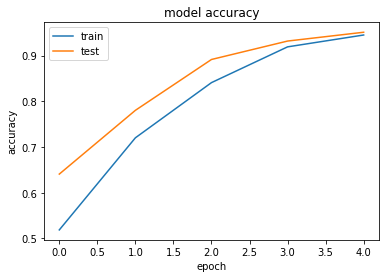

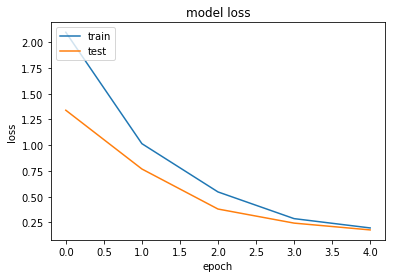

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline 
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [165]:
from keras.preprocessing.sequence import pad_sequences


def final_predictions(x, y, x_tk, y_tk):
    """
    Gets predictions using the final model
    :param x: Preprocessed English data
    :param y: Preprocessed French data
    :param x_tk: English tokenizer
    :param y_tk: French tokenizer
    """
    # TODO: Train neural network using model_final
    # Save model, so that it can quickly load it in future (and perhaps resume training)
    if os.path.exists("final_model.h5") == False:
        model_final.save("final_model.h5")
    
    ## DON'T EDIT ANYTHING BELOW THIS LINE
    score = model_final.evaluate(X_input, preproc_french_sentences, verbose=0)
    print("Train accurancy: ", score[1])
    y_id_to_word = {value: key for key, value in y_tk.word_index.items()}
    y_id_to_word[0] = '<PAD>'

    sentence = 'new jersey is sometimes calm during the fall and it is snowy in april'
    sentence = [x_tk.word_index[word] for word in sentence.split()]
    sentence = pad_sequences([sentence], maxlen=x.shape[-1], padding='post')
    sentences = np.array([sentence[0], x[0]])
    predictions = model_final.predict(sentences, len(sentences))

    print('Sample 1:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))
   # print('Il a vu un vieux camion jaune')
    print('Sample 2:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[1]]))
    print(' '.join([y_id_to_word[np.argmax(x)] for x in y[0]]))

    return model_final

final_model = final_predictions(preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer)

Train accurancy:  0.9544264909901349


KeyError: 'calm'